# Imports and loading of datasets.

In [14]:
import numpy as np
import pandas as pd

from numpy import genfromtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn import tree
from sklearn.svm import SVC
from mpl_toolkits.basemap import Basemap
# from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

from sklearn.decomposition import PCA
from base64 import encode
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn import compose
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score,\
 confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import  label_binarize
import copy


from ax.plot.contour import plot_contour
from ax.plot.trace import optimization_trace_single_method
from ax import optimize
from ax.utils.notebook.plotting import render, init_notebook_plotting
%matplotlib inline

rng = 0

test_values = pd.read_csv("./test-set-values.csv")
train_values = pd.read_csv("./training-set-values.csv")
train_labels = pd.read_csv("./training-set-labels.csv")


In [15]:
print("columns:")
print(train_values.columns.values)
print()
print(train_values.info())

columns:
['id' 'amount_tsh' 'date_recorded' 'funder' 'gps_height' 'installer'
 'longitude' 'latitude' 'wpt_name' 'num_private' 'basin' 'subvillage'
 'region' 'region_code' 'district_code' 'lga' 'ward' 'population'
 'public_meeting' 'recorded_by' 'scheme_management' 'scheme_name' 'permit'
 'construction_year' 'extraction_type' 'extraction_type_group'
 'extraction_type_class' 'management' 'management_group' 'payment'
 'payment_type' 'water_quality' 'quality_group' 'quantity'
 'quantity_group' 'source' 'source_type' 'source_class' 'waterpoint_type'
 'waterpoint_type_group']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 


In [16]:
train_values.iloc[:, :20].describe(include='all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
count,59400.000000,59400.000000,59400,55765,59400.000000,55745,59400.000000,5.940000e+04,59400,59400.000000,59400,59029,59400,59400.000000,59400.000000,59400,59400,59400.000000,56066,59400
unique,NaN,NaN,356,1897,NaN,2145,NaN,NaN,37400,NaN,9,19287,21,NaN,NaN,125,2092,NaN,2,1
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,Lake Victoria,Madukani,Iringa,NaN,NaN,Njombe,Igosi,NaN,True,GeoData Consultants Ltd
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,10248,508,5294,NaN,NaN,2503,307,NaN,51011,59400
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,NaN,NaN,NaN,15.297003,5.629747,NaN,NaN,179.909983,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,NaN,NaN,NaN,17.587406,9.633649,NaN,NaN,471.482176,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN,0.000000,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,NaN,NaN,NaN,12.000000,3.000000,NaN,NaN,25.000000,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,NaN,NaN,NaN,17.000000,5.000000,NaN,NaN,215.000000,NaN,NaN


In [17]:
train_values.iloc[:, 21:].describe(include='all')

,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,31234,56344,59400.000000,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,2696,2,NaN,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,K,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,682,38852,NaN,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625
mean,NaN,NaN,1300.652475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,951.620547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [19]:
train_labels.describe()

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


Identifying features of object type and changing them to string

In [20]:
train_values.dtypes[lambda x: x == 'object']

date_recorded            object
funder                   object
installer                object
wpt_name                 object
basin                    object
subvillage               object
region                   object
lga                      object
ward                     object
public_meeting           object
recorded_by              object
scheme_management        object
scheme_name              object
permit                   object
extraction_type          object
extraction_type_group    object
extraction_type_class    object
management               object
management_group         object
payment                  object
payment_type             object
water_quality            object
quality_group            object
quantity                 object
quantity_group           object
source                   object
source_type              object
source_class             object
waterpoint_type          object
waterpoint_type_group    object
dtype: object

In [21]:
d = {
    "funder": "string",
    "installer": "string",
    "wpt_name": "string",
    "basin": "string",
    "subvillage": "string",
    "region": "string",
    "lga": "string",
    "ward": "string",
    "public_meeting": "string",
    "recorded_by": "string",
    "scheme_management": "string",
    "scheme_name": "string",
    "permit": "string",
    "extraction_type": "string",
    "extraction_type_group": "string",
    "extraction_type_class": "string",
    "management": "string",
    "management_group": "string",
    "payment": "string",
    "payment_type": "string",
    "water_quality": "string",
    "quality_group": "string",
    "quantity": "string",
    "quantity_group": "string",
    "source": "string",
    "source_type": "string",
    "source_class": "string",
    "waterpoint_type": "string",
    "waterpoint_type_group": "string",
    "date_recorded":"string",
}
train_values= train_values.astype(d)
# train_values["date_recorded"] = pd.to_datetime(
#     train_values["date_recorded"],
#     infer_datetime_format=True
# )

train_labels.status_group = train_labels.status_group.astype('string')
train = train_values.merge(train_labels, on="id")
train_labels.drop('id',inplace=True,axis=True)

# Null and Nan checking

In [22]:
print("any NANs in train_values?")
print(pd.isna(train_values).any()[lambda x:x == True])

any NANs in train_values?
funder               True
installer            True
subvillage           True
public_meeting       True
scheme_management    True
scheme_name          True
permit               True
dtype: bool


# Checking correlations between numerical features

# Showing Values:

In [23]:
train_values.iloc[:, :20].head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,<NA>,GeoData Consultants Ltd
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd


In [24]:
train_values.iloc[:, 21:40].head()

,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,<NA>,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,<NA>,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,<NA>,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


# Visualisations

heatmap and pairplot of scatter plot are use to try to find highly correlated numerical variables so to remove them in our models.

<AxesSubplot:>

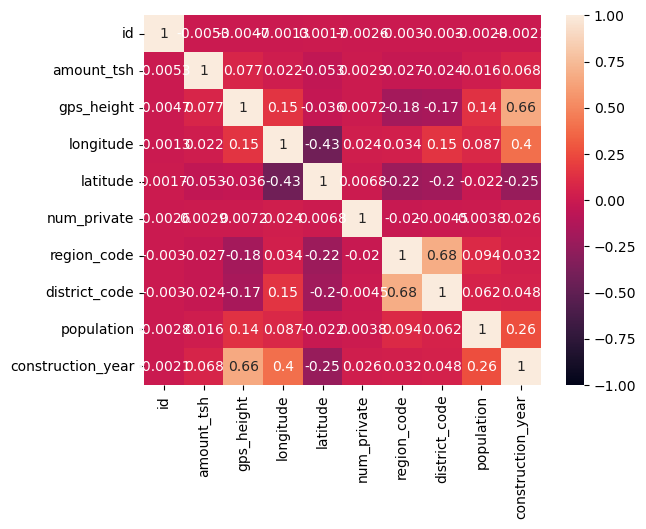

In [25]:
numerical_variables = [
    "amount_tsh",
    "gps_height",
    "longitude",
    "latitude",
    "region_code",
    "district_code",
    "population",
    "construction_year",
]
# print(train.columns)
# sns.pairplot(train.sample(1000),kind="scatter")
# commented out the previous line because running all with this line is very slow

sns.heatmap(data=train_values.corr(),vmin=-1, vmax=1, annot=True)

KeyboardInterrupt: 

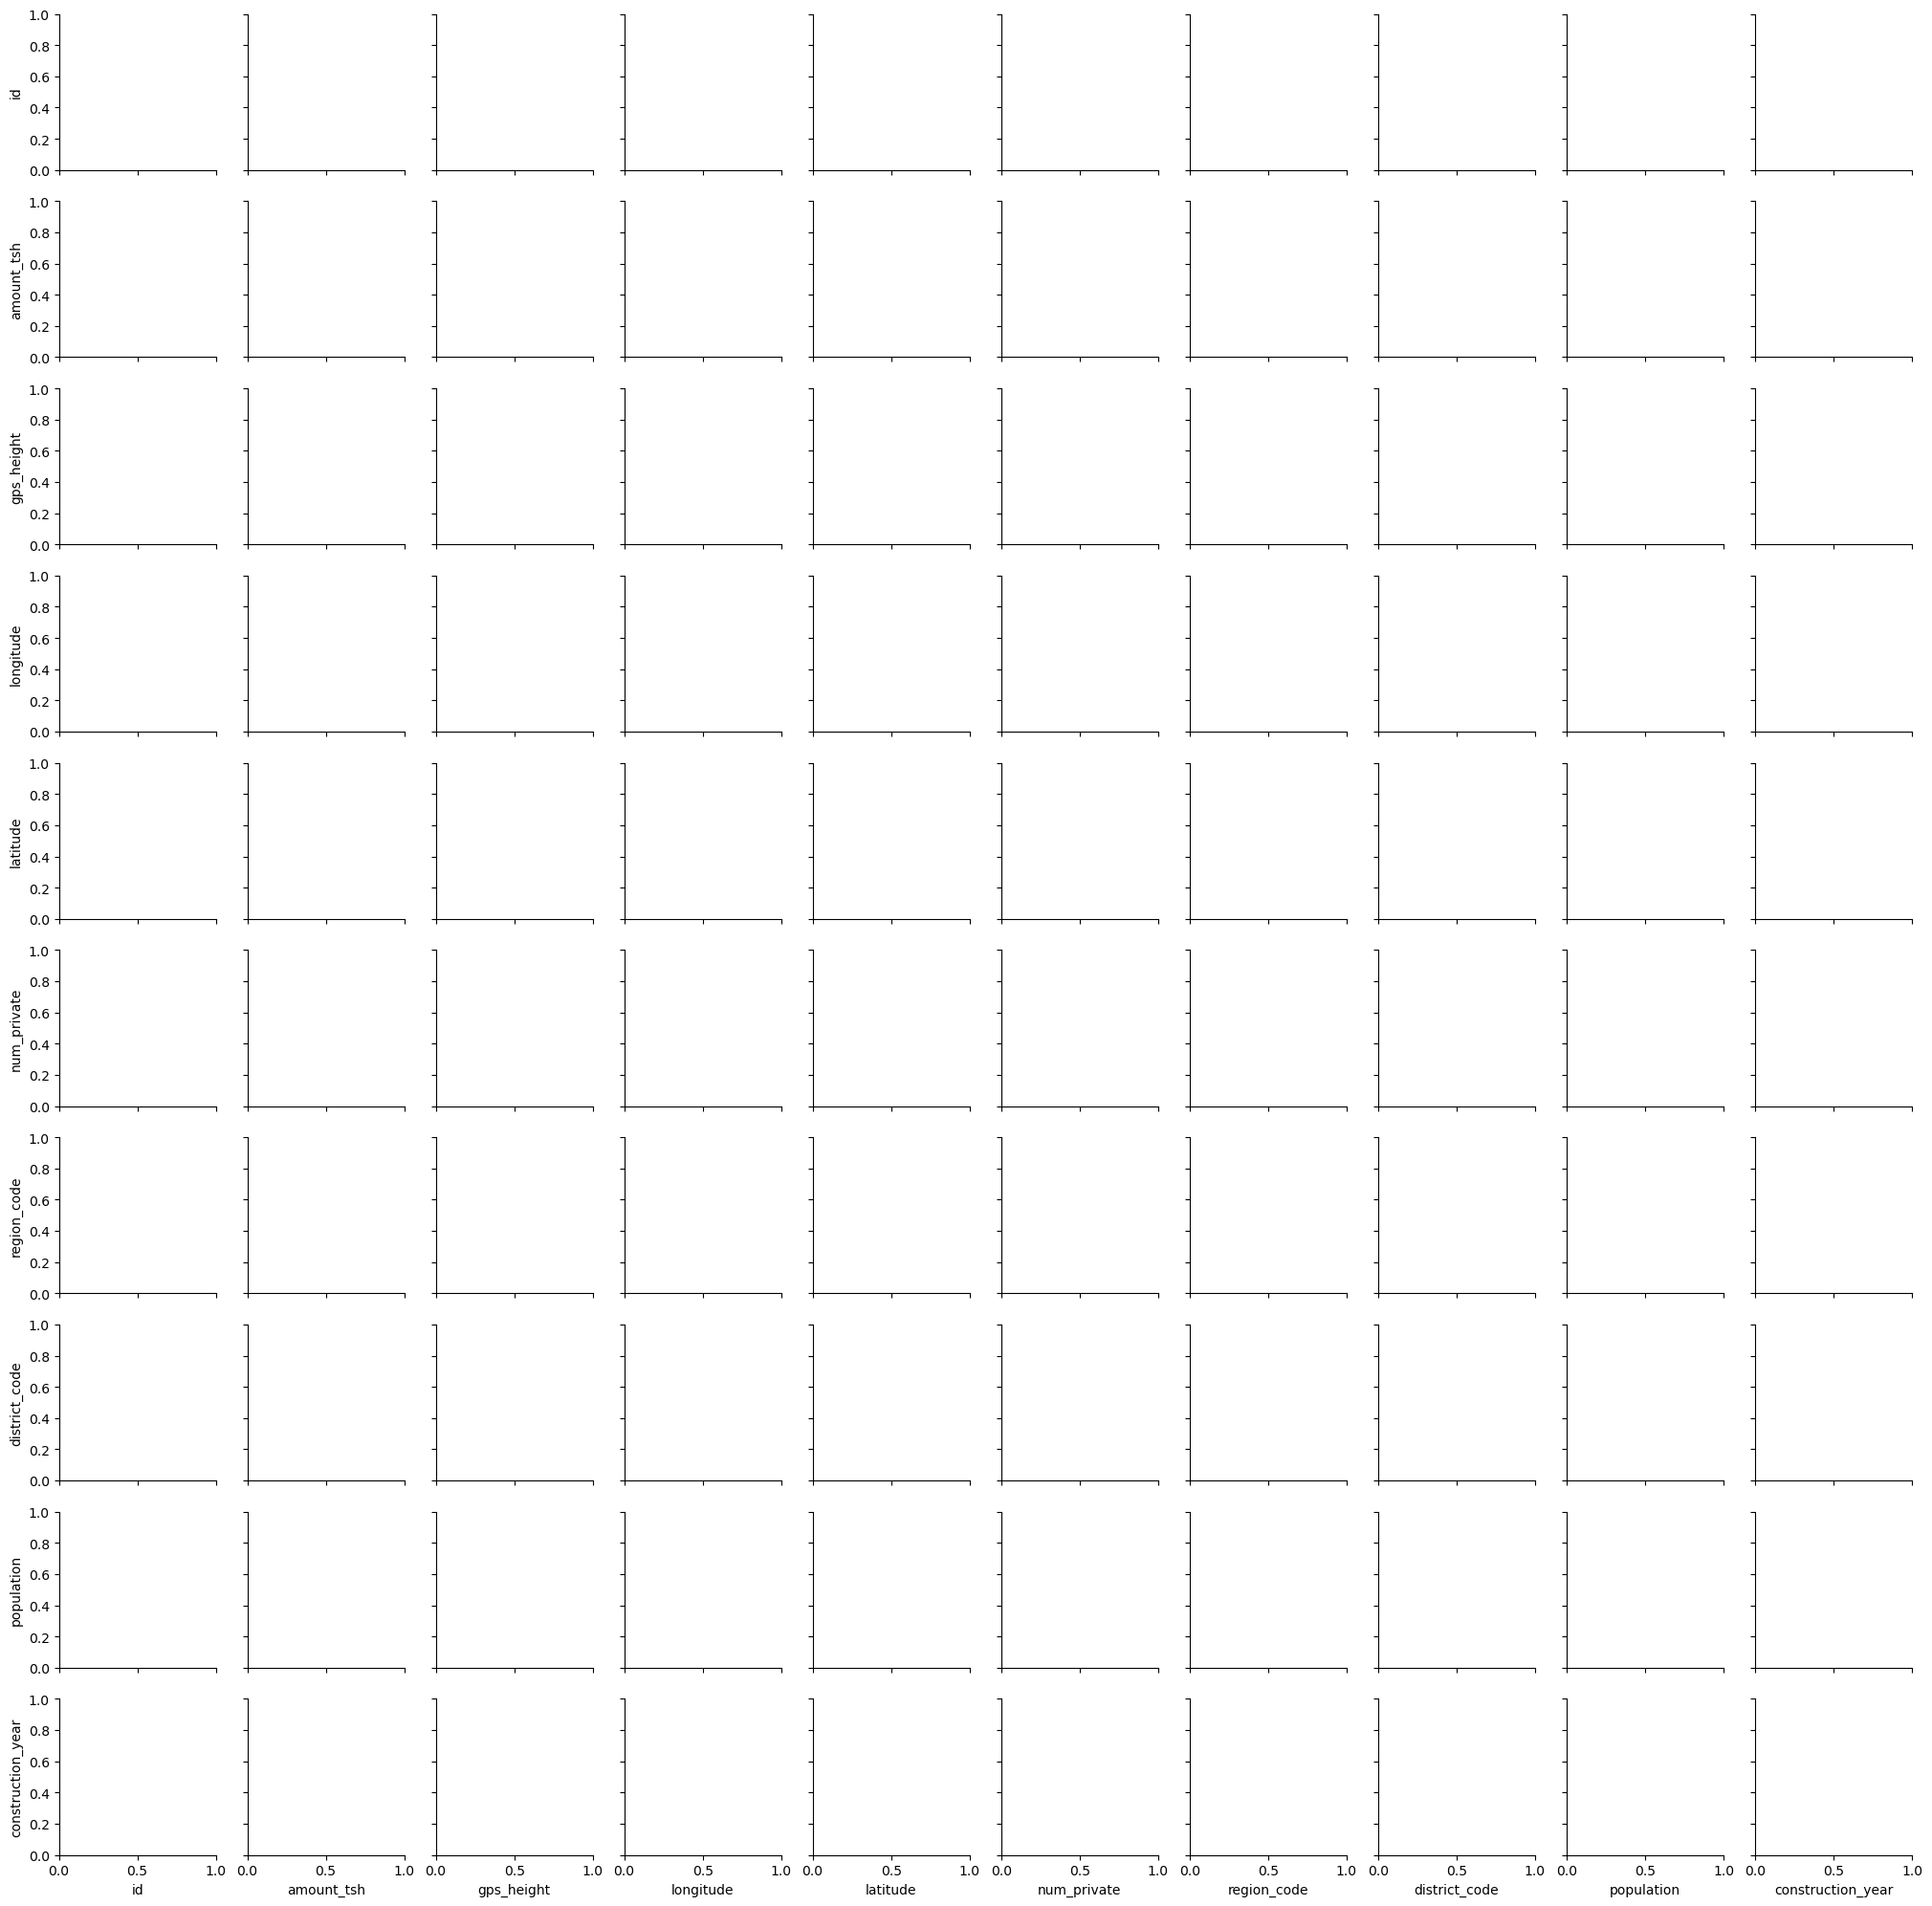

In [13]:
sns.pairplot(train,hue='status_group',kind='scatter')

There is not much useful correlations inbetween the numerical features

Including population and amount of tsh

### Location based status groups


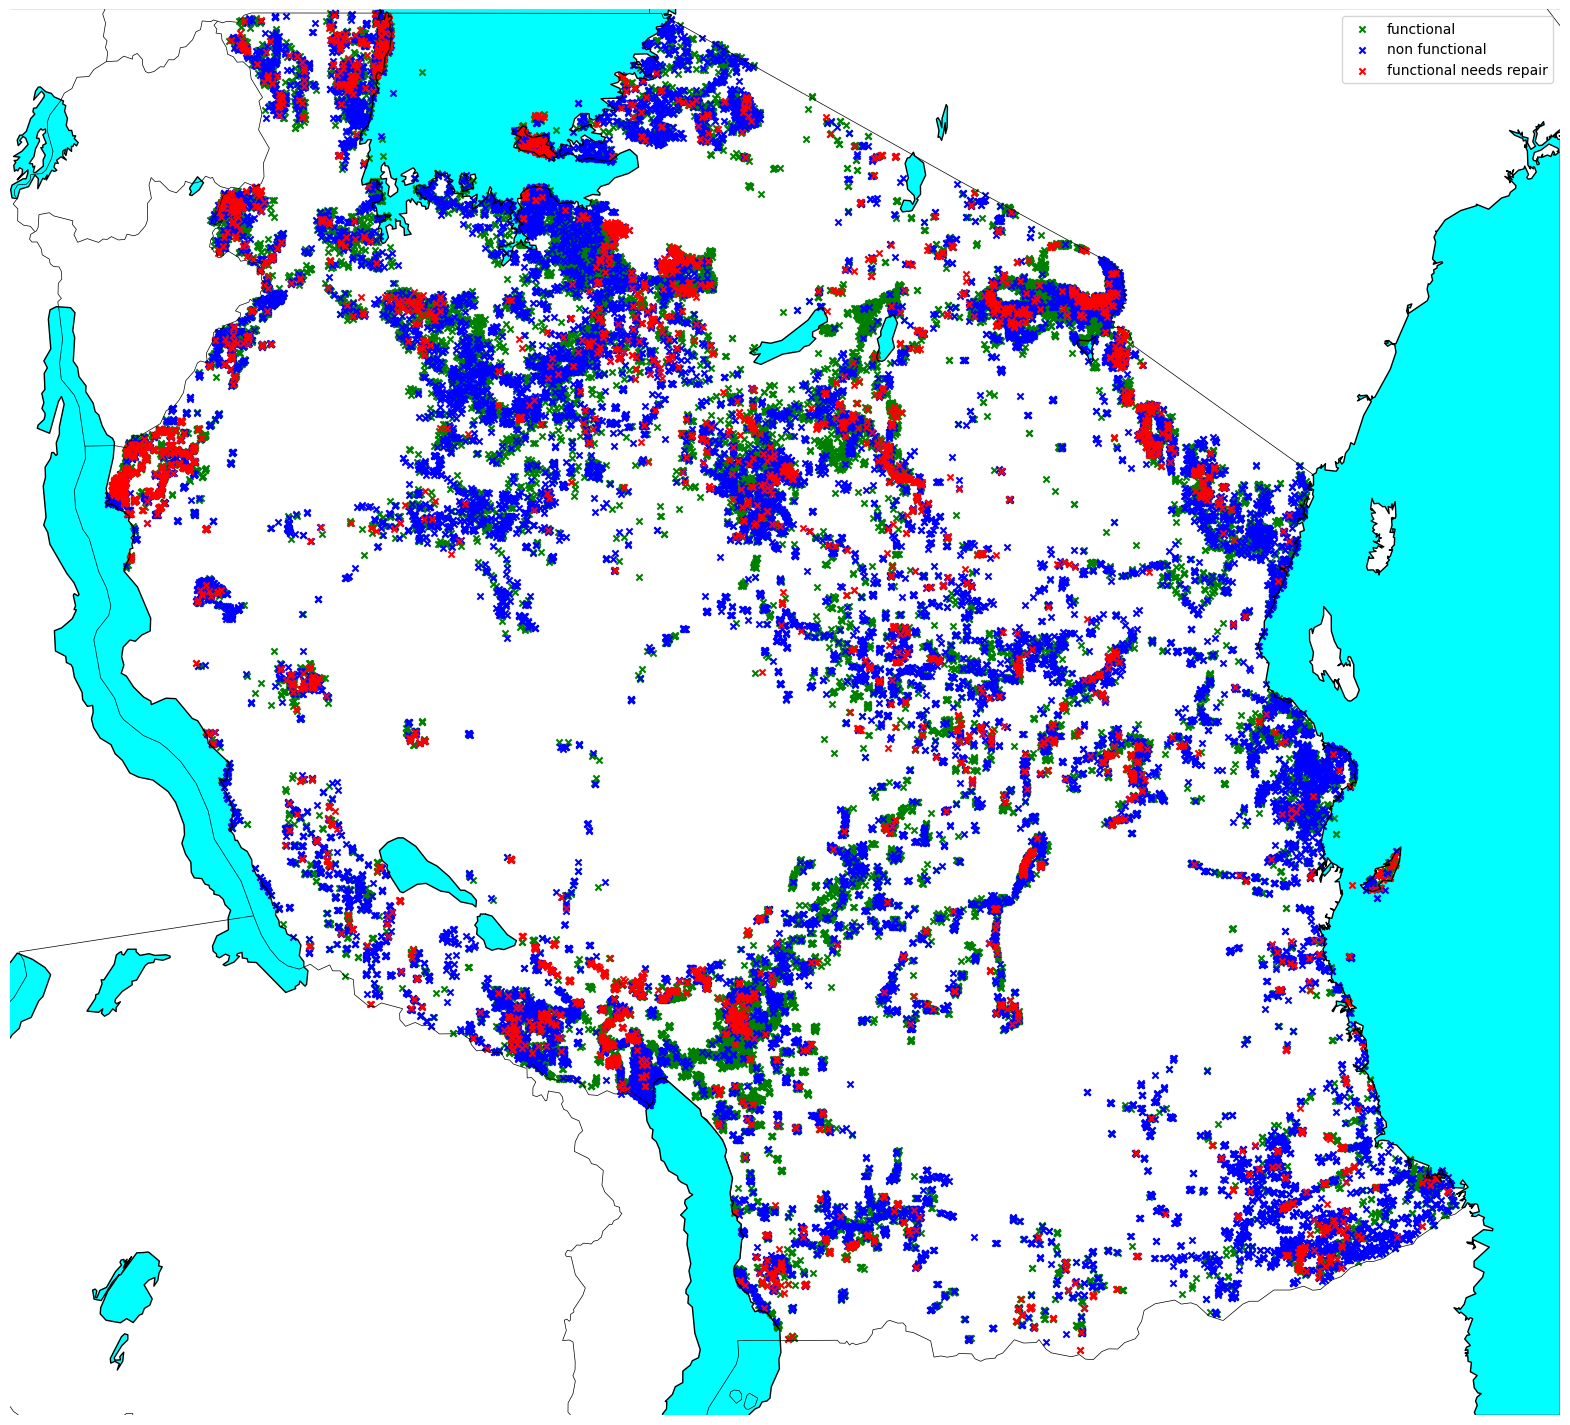

In [85]:
f, ax = plt.subplots(figsize=(20,20))
sns.despine(f, left=True, bottom=True)
plt.xlim(27,43)
m = Basemap(resolution='i',llcrnrlat=-12.168,urcrnrlat=-0.967,llcrnrlon=28.828,urcrnrlon=41.177)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
m.drawcountries()
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='white',lake_color='aqua')

for g in train.status_group.unique():
    if g == "functional":
        markercolor="green"
    elif g == "functional needs repair":
        markercolor = "red"
    elif g == "non functional":
        markercolor = "blue"

    ax.scatter(train.longitude[train.status_group==g],train.latitude[train.status_group==g],label=g,
    s=20,c=markercolor,marker='x',)
ax.legend()

# for index, row in train.iterrows():
#     if row.status_group == "functional":
#         markercolor="green"
#     elif row.status_group == "functional need repair":
#         markercolor = "white"
#     else:
#         markercolor = "black"
#     m.plot(row.longitude,
#         row.latitude,
#         marker="*",
#         markersize=4,
#         markeredgewidth=0,
#         markeredgecolor="white",
#         markerfacecolor=markercolor
#     )
plt.show()

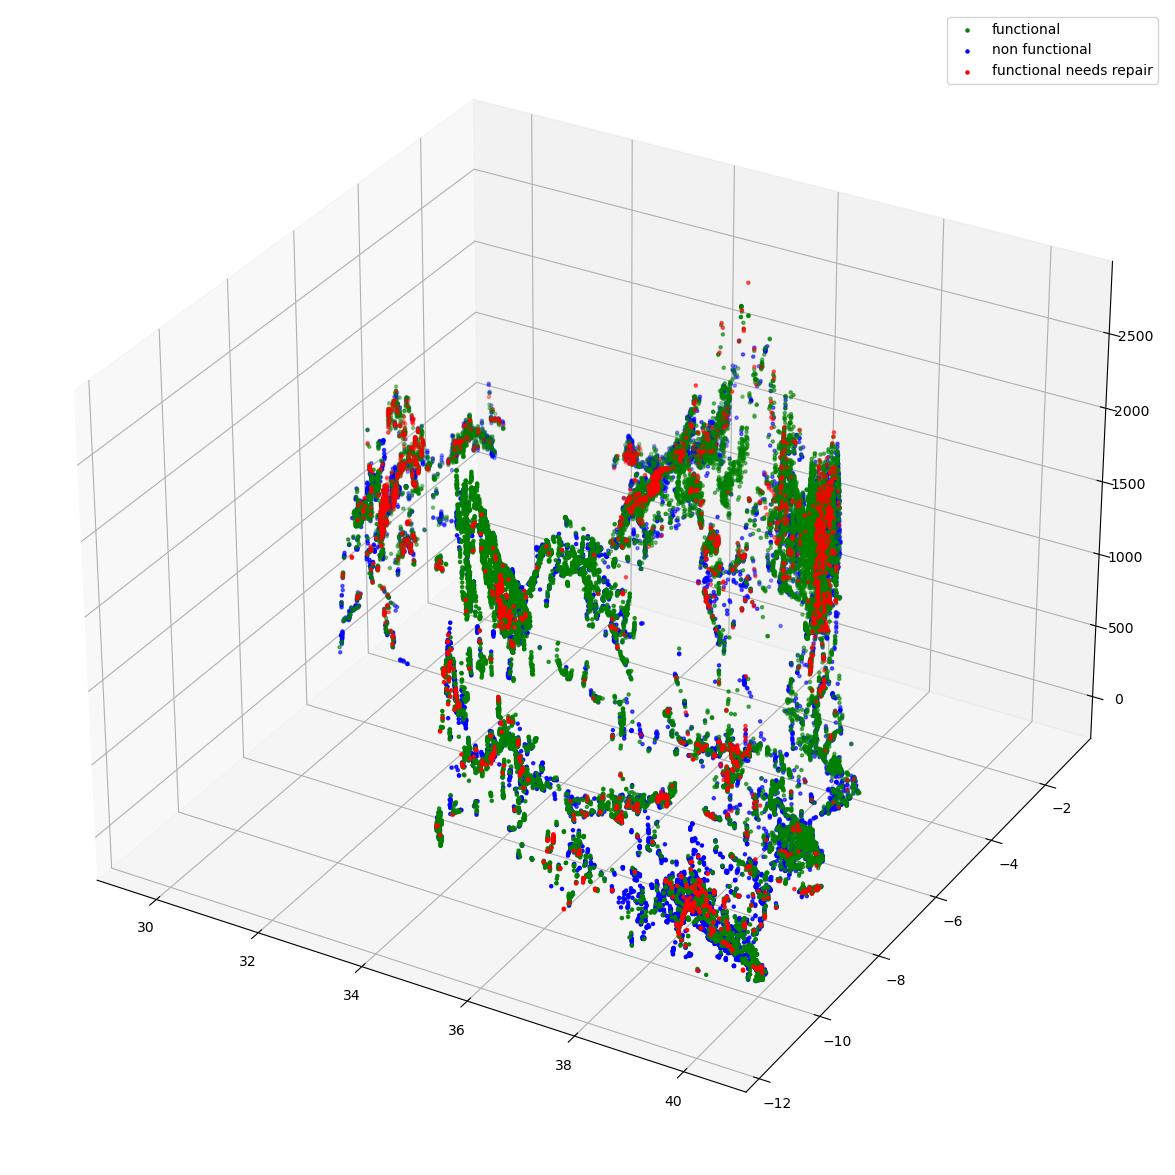

In [86]:

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection = '3d')
t2 = train[train.gps_height!=0]

# t2 = t2[t2.status_group=='functional']


for g in train.status_group.unique():
    if g == "functional":
        markercolor="green"
    elif g == "functional needs repair":
        markercolor = "red"
    elif g == "non functional":
        markercolor = "blue"
    x = t2.longitude[t2.status_group==g]
    y=t2.latitude[t2.status_group==g]
    z=t2.gps_height[t2.status_group==g]
    ax.scatter(x,y,z,s=5,label=g,c=markercolor)

fig.title="pump functionality based on 3d geographical data"
ax.legend()
plt.show()

<AxesSubplot:xlabel='status_group', ylabel='Count'>

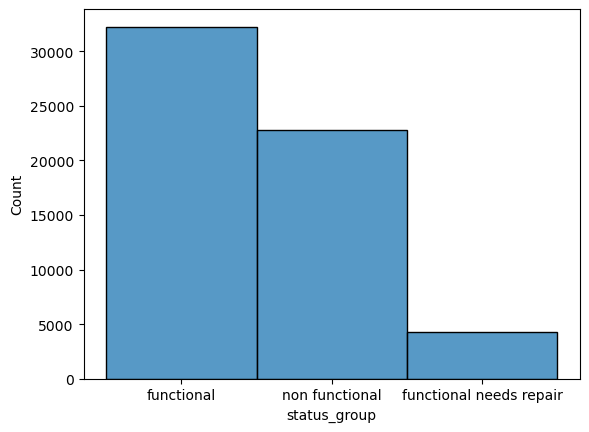

In [184]:
sns.histplot(train,x='status_group')


more functional pumps than  sub-functional pumps but not by much

Barplots are used for comparision of distributions but also taking into consideration of outliers.

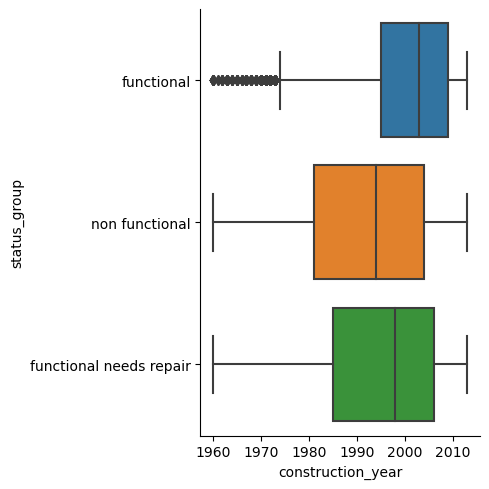

In [185]:
temp = train[train.construction_year != 0]
sns.catplot(kind= 'box',data = temp, y='status_group',x='construction_year')

more sub-functional pumps for in their respective 25% and 50% percentiles
than the funtional pumps.

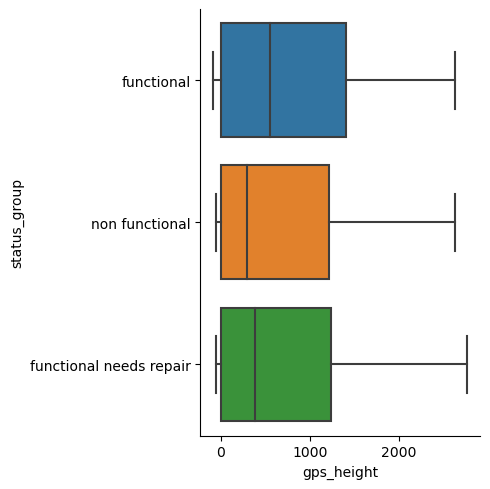

In [186]:
sns.catplot(data = train, x = 'gps_height',y = 'status_group',kind='box')


'height' has a bit of correlation to 'status_group'? Higher = more functional? But correlation isn't causation.

<AxesSubplot:xlabel='population', ylabel='status_group'>

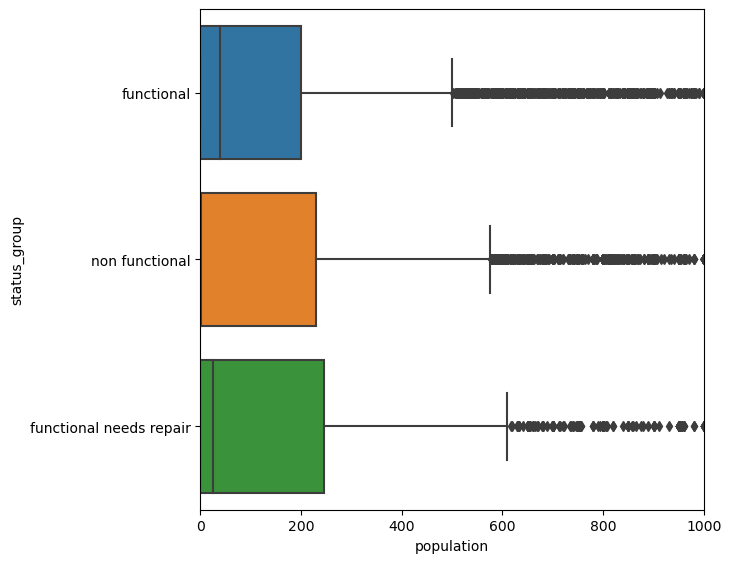

In [187]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
ax.set_xlim((0,1000))
sns.boxplot(data = train, x = 'population',y = 'status_group' ,ax=ax)

# Creation and comparison of Estimators

In [188]:

cat_vars = [
    'funder', 'installer', "date_recorded",
    'wpt_name', 'num_private', 'basin',
    'subvillage', 'region',  'lga',
    'ward', 'public_meeting', 'recorded_by',
    'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group',
    'extraction_type_class', 'management', 'management_group', 'payment',
    'payment_type', 'water_quality', 'quality_group', 'quantity',
    'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', "waterpoint_type_group"]

# -1 instead of np.nan works for me
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
scaler = StandardScaler()
pca = PCA(random_state=0)
gbc = GradientBoostingClassifier()
svc = SVC()
dtc = tree.DecisionTreeClassifier()

train_values.fillna(value="Unknown", inplace=True)
print(pd.isna(train_values).any()[lambda x: x == True])


Series([], dtype: bool)


Initial fitting and transformation to find the best number of principal components.

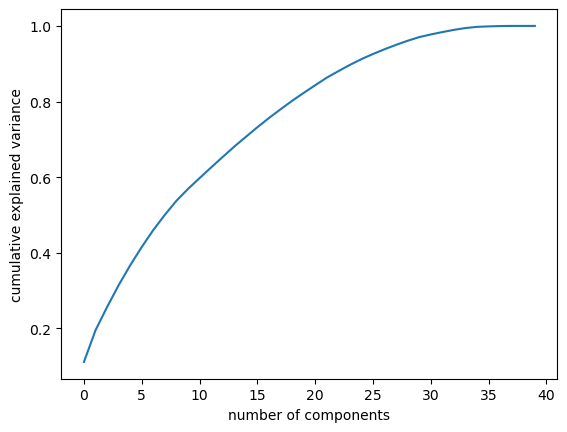

In [189]:
encoded_train_values = encoder.fit_transform(train_values)
scaled_train_values = scaler.fit_transform(encoded_train_values,y=train_labels)
pca.fit(scaled_train_values)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

15 component for ~80% of the variance is good enough.

KFold for extracting train and test holdouts for a three way holdout; useful for hyperparameter tuning. Remember there is also test_train extracted from the challange. y text labels are label binarize

In [190]:
kfold = KFold(5)
fold_indices = []
for rest, pick in kfold.split(train_values):
    fold_indices.append(pick)

trainIndices = fold_indices[0]
np.append(trainIndices, fold_indices[1])
np.append(trainIndices, fold_indices[2])
np.append(trainIndices, fold_indices[3])
testIndices = fold_indices[4]

x_train = train_values.iloc[trainIndices,:]
y_train = train_labels.iloc[trainIndices,:]
x_test = train_values.iloc[testIndices,:]
y_test = train_labels.iloc[testIndices,:]

y_test_binarized = label_binarize(y_train,classes=y_train.iloc[:,0].unique())

In [191]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11880 entries, 47520 to 59399
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_group  11880 non-null  string
dtypes: string(1)
memory usage: 185.6 KB


## Estimator 1: Gradient Boosting classifier

In [193]:
def train_predict_est_1(parameters, x_train,y_train,x_test,show_stats=False):
    est = Pipeline(steps=[
        ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ('scaler',StandardScaler()),
        ('principal_component_analysis',PCA(n_components=15,random_state=rng)),
        ('gradient_boosting_classifier',GradientBoostingClassifier(
            learning_rate=parameters['gbr_learning_rate'],
            n_estimators= parameters['gbr_n_estimators']
        ))
    ])
    pipeline = est.fit(x_train,y=y_train)
    y_predictions = pipeline.predict(x_test)

    
    if not show_stats:
        return y_predictions
    y_probabilities = pipeline.predict_proba(x_test)
    cm = confusion_matrix(y_test,y_predictions)
    display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=est.classes_)
    display.plot()
    plt.xticks(rotation = 30)
    plt.title("est1")
    plt.show()

    print(classification_report(y_train, y_predictions))
    print("AUROC score:",roc_auc_score(y_test_binarized, y_probabilities,multi_class='ovr',labels=[0,1,2]))
    return y_predictions
    
parameterScope=[
        {"name":"gbr_learning_rate" ,"type": "choice","value_type":"float", 
         "values": [0.07,0.06,0.05,0.04,0.03,0.02,0.01]},
        {"name":"gbr_n_estimators" ,"type": "range", "bounds": [150,200]},
]
def ax_optimise(parameters):
    predictions = train_predict_est_1(parameters, x_train,y_train.values.ravel(),x_test,show_stats=False)
    return mean_absolute_error(y_test_binarized,
    label_binarize(predictions,classes=['functional','functional needs repair','non functional'])
    )

best_parameters_1, values_1, experiment_1, model_1 = optimize(
    parameters=parameterScope,
    evaluation_function=ax_optimise,
    objective_name='accuracy',
    total_trials=15,
    minimize=True
)

/home/ryan/anaconda3/lib/python3.10/site-packages/ax/core/parameter.py:480: UserWarning:

`is_ordered` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `is_ordered` during `ChoiceParameter` construction.

/home/ryan/anaconda3/lib/python3.10/site-packages/ax/core/parameter.py:480: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "gbr_learning_rate". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

[INFO 10-01 11:36:05] ax.service.utils.instantiation: Inferred value type of ParameterType.INT for parameter gbr_n_estimators. If that is not the expected value type, you can explicity specify 'value_type' ('int', 'float', 'bool' or 'str') in parameter dict.
[INFO 10-01 11:36:05] ax.service.utils.instantiation: Created sea

## Estimator 2: Decision Tree Classifier

Abitrary choices of max dept and criterion

In [194]:
def train_predict_est_2(parameters, x_train,y_train,x_test,show_stats=False):
    est = Pipeline(steps=[
        ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ('scaler',StandardScaler()),
        ('principal_component_analysis',PCA(n_components=15,random_state=rng)),
        ('decision_tree_classifier',tree.DecisionTreeClassifier(
            random_state=rng,
            max_depth=parameters['max_depth'],
            # criterion=parameters['criterion']
        ))
    ])
    pipeline = est.fit(x_train,y=y_train)
    y_predictions = pipeline.predict(x_test)

    
    if not show_stats:
        return y_predictions
    y_probabilities = pipeline.predict_proba(x_test)
    cm = confusion_matrix(y_test,y_predictions)
    display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=est.classes_)
    display.plot()
    plt.xticks(rotation = 30)
    plt.title("est2")
    plt.show()

    print(classification_report(y_train, y_predictions))
    print("AUROC score:",roc_auc_score(y_test_binarized, y_probabilities,multi_class='ovr',labels=[0,1,2]))
    return y_predictions
    
parameterScope=[
        {"name":"max_depth" ,"type": "choice","value_type":"int", 
         "values": [1,2,3,4,5,6,7,8,9,10]},
        # {"name":"criterion" ,"type": "choice","value_type":"str","values":["gini","entropy","log_loss"]},
]

def ax_optimise(parameters):
    predictions = train_predict_est_2(parameters, x_train,y_train.values.ravel(),x_test,show_stats=False)
    return mean_absolute_error(y_test_binarized,
    label_binarize(predictions,classes=['functional','functional needs repair','non functional'])
    )

best_parameters_2, values_2, experiment_2, model_2 = optimize(
    parameters=parameterScope,
    evaluation_function=ax_optimise,
    objective_name='accuracy',
    total_trials=15,
    minimize=True
)

/home/ryan/anaconda3/lib/python3.10/site-packages/ax/core/parameter.py:480: UserWarning:

`is_ordered` is not specified for `ChoiceParameter` "max_depth". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `is_ordered` during `ChoiceParameter` construction.

/home/ryan/anaconda3/lib/python3.10/site-packages/ax/core/parameter.py:480: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "max_depth". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

[INFO 10-01 12:00:38] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[ChoiceParameter(name='max_depth', parameter_type=INT, values=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], is_ordered=True, sort_values=True)], parameter_constraints=[]).
[INFO 10-01 12:00:38] ax.modelbridge.dispatch_utils: Using Bayesian optimization since

## Estimator 3: Support Vector Classificer (SVM)

proability is set to true because I need predict_proab for comparision of these classifiers.
according the guide, a higher cache size is recommended.

Abitrary choice of degrees and almost all kernel types except for pre-computed as it requires square matrix.

In [195]:
def train_predict_est_3(parameters, x_train,y_train,x_test,show_stats=False):
    est = Pipeline(steps=[
        ('encoder',OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ('scaler',StandardScaler()),
        ('principal_component_analysis',PCA(n_components=15,random_state=rng)),
        ('support_vector_classifier',SVC(
            # kernel=parameters['kernel'],
            degree=parameters['degree'],
            cache_size=1000,
            probability=True
        ))
    ])
    pipeline = est.fit(x_train,y=y_train)
    y_predictions = pipeline.predict(x_test)
 
    
    if not show_stats:
        return y_predictions
    y_probabilities = pipeline.predict_proba(x_test)
    cm = confusion_matrix(y_test,y_predictions)
    display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=est.classes_)
    display.plot()
    plt.xticks(rotation = 30)
    plt.title("est3")
    plt.show()

    print(classification_report(y_train, y_predictions))
    print("AUROC score:",roc_auc_score(y_test_binarized, y_probabilities,multi_class='ovr',labels=[0,1,2]))
    return y_predictions
    
parameterScope=[
        {"name":"degree" ,"type": "choice","value_type":"int", 
         "values": [1,2,3,4,5,6,7,8,9,10]},
        {"name":"kernel" ,"type": "choice","value_type":"str",
        "values":["linear","poly","rbf",'sigmoid']},
]

def ax_optimise(parameters):
    predictions = train_predict_est_3(parameters, x_train,y_train.values.ravel(),x_test,show_stats=False)
    return mean_absolute_error(y_test_binarized,
    label_binarize(predictions,classes=['functional','functional needs repair','non functional'])
    )

best_parameters_3, values_3, experiment_3, model_3 = optimize(
    parameters=parameterScope,
    evaluation_function=ax_optimise,
    objective_name='accuracy',
    total_trials=15,
    minimize=True
)

/home/ryan/anaconda3/lib/python3.10/site-packages/ax/core/parameter.py:480: UserWarning:

`is_ordered` is not specified for `ChoiceParameter` "degree". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `is_ordered` during `ChoiceParameter` construction.

/home/ryan/anaconda3/lib/python3.10/site-packages/ax/core/parameter.py:480: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "degree". Defaulting to `True` for parameters of `ParameterType` INT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/home/ryan/anaconda3/lib/python3.10/site-packages/ax/core/parameter.py:480: UserWarning:

`is_ordered` is not specified for `ChoiceParameter` "kernel". Defaulting to `False` for parameters of `ParameterType` STRING. To override this behavior (or avoid this warning), specify `is_ordered` during `ChoiceParameter` construction.

/home/ryan/anaconda3/l

## Comparison between estimator pipelines

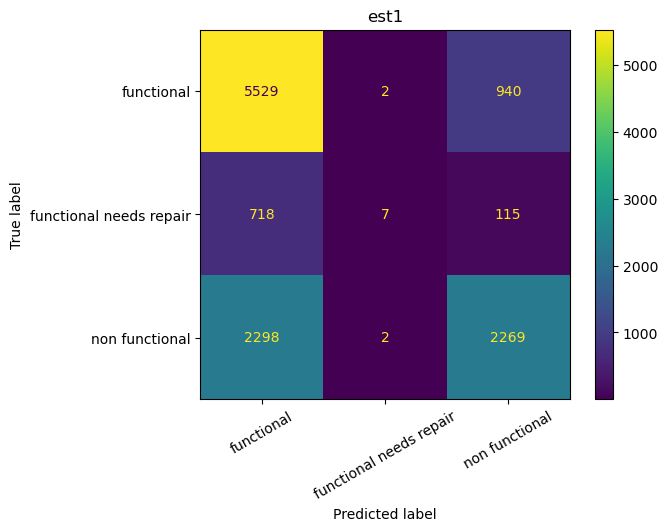

                         precision    recall  f1-score   support

             functional       0.54      0.72      0.61      6431
functional needs repair       0.00      0.00      0.00       861
         non functional       0.39      0.28      0.32      4588

               accuracy                           0.50     11880
              macro avg       0.31      0.33      0.31     11880
           weighted avg       0.44      0.50      0.46     11880

AUROC score: 0.48802637895602324


array(['functional', 'functional', 'functional', ..., 'non functional',
       'functional', 'functional'], dtype=object)

In [ ]:
train_predict_est_1(best_parameters_1, x_train,y_train.values.ravel(),x_test,show_stats=True)

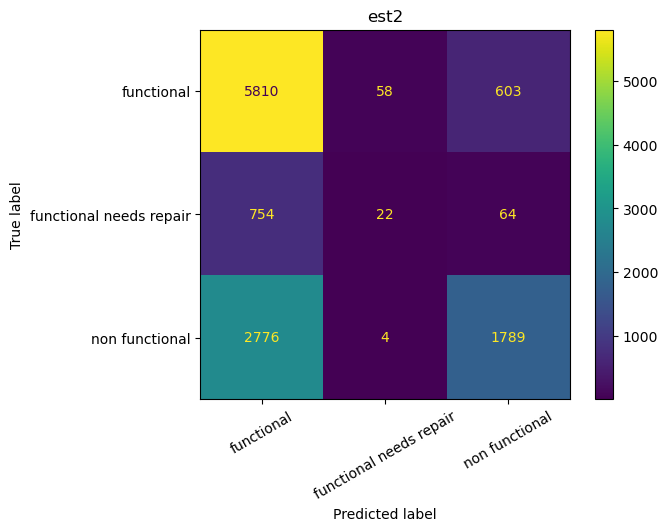

                         precision    recall  f1-score   support

             functional       0.54      0.78      0.64      6431
functional needs repair       0.01      0.00      0.00       861
         non functional       0.38      0.20      0.26      4588

               accuracy                           0.50     11880
              macro avg       0.31      0.33      0.30     11880
           weighted avg       0.44      0.50      0.45     11880

AUROC score: 0.4926182715816732


array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

In [ ]:
train_predict_est_2(best_parameters_2, x_train,y_train.values.ravel(),x_test,show_stats=True)

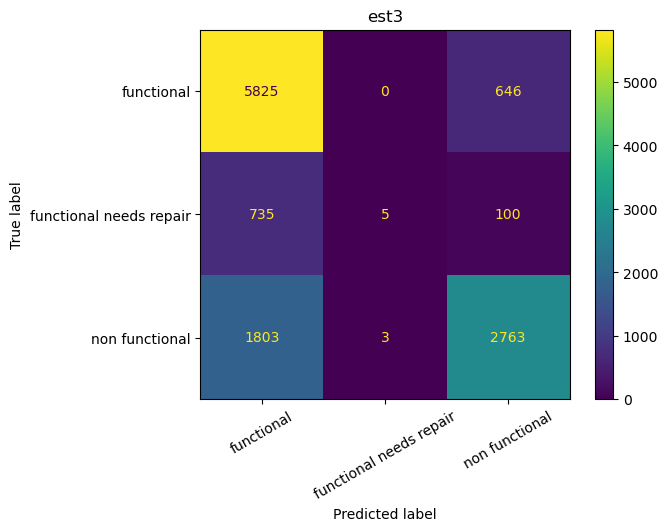

                         precision    recall  f1-score   support

             functional       0.54      0.70      0.61      6431
functional needs repair       0.00      0.00      0.00       861
         non functional       0.39      0.30      0.34      4588

               accuracy                           0.50     11880
              macro avg       0.31      0.34      0.32     11880
           weighted avg       0.45      0.50      0.46     11880

AUROC score: 0.493595920953892


In [ ]:
Y_prediction_from_est_3 = train_predict_est_3(best_parameters_3, x_train,y_train.values.ravel(),x_test,show_stats=True)

I choose SVC as it has good non functional precision and higher accuracy. Although all classifiers here seems to be very similar which each classifer seems to have their trade offs

In [ ]:
test_values = test_values.loc[:,x_train.columns]
test_predictions = train_predict_est_3(best_parameters_3,x_train,y_train,test_values,False)

/home/ryan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



### Processing result into a csv file.

In [ ]:
results = pd.concat([test_values,pd.DataFrame(test_predictions,columns=['status_group'])],axis=1)\
                .loc[:,["id","status_group"]]\
                .set_index(keys="id",drop=True)
results.to_csv("results.csv")
results

,status_group
id,
50785,non functional
51630,non functional
17168,non functional
45559,non functional
49871,non functional
...,...
39307,non functional
18990,non functional
28749,non functional
